<a href="https://www.kaggle.com/code/jahnavitiwari02/mask-detection-model?scriptVersionId=109538307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#installing opencv to read images
!pip install opencv-python

#importing necessary libraries

#importing numpy for multidimensional arrays and matrices
import numpy as np

#pandas for analysis, data cleaning 
import pandas as pd

#plyplot for visualising data on a plot, pie chart and showing image
from matplotlib import pyplot as plt

#seaborn for hist plots 
import seaborn as sns

#os for making, editing and removing directory
import os

import glob

#tensorflow for open source library to input keras 
import tensorflow as tf
print('Tensorflow version :',tf.__version__)
#keras to create artificial neural networks(CNN)
from tensorflow import keras
print('Keras version:',keras.__version__)
#cv2(open cv) in order to read  images
import cv2

#element tree to parase xml files
from xml.etree import ElementTree

Tensorflow version : 2.6.4
Keras version: 2.6.0


In [2]:
#file location of face-mask-detection/annotations into annotations
annotations='../input/face-mask-detection/annotations'
#file location of face-mask-detection/images into images
images='../input/face-mask-detection/images'

In [3]:
#listing all annoations into annootations_files
annotation_files= !ls '../input/face-mask-detection/annotations'
annotation_files[:5]

['maksssksksss0.xml',
 'maksssksksss1.xml',
 'maksssksksss10.xml',
 'maksssksksss100.xml',
 'maksssksksss101.xml']

In [4]:
#listing all images into image_files
image_files= !ls '../input/face-mask-detection/images'
image_files[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss100.png',
 'maksssksksss101.png']

In [5]:
#total number of files and images in the dataset which must be equivalent to each other
len(annotation_files),len(image_files)

(853, 853)

**Extraction of data**

**Extraction of data from images
extracting necessary information present in the xmin,ymin,height,labels and weight of all images

In [6]:
#to extract necessary info present in the xml document in a dictionary format
info={
    'xmin':[],
    'ymin':[],
    'xmax':[],
    'ymax':[],
    'label':[],
    'file':[],
    'width':[],
    'height':[]    
}
#finding all files ending with xml
for i in glob.glob(annotations+'/*.xml'):
    #parsing all xml files with element tree
    tree=ElementTree.parse(i)
    #getting all the neceesary attribute info into the dictionary
    for element in tree.iter():
        
        if 'size' in element.tag:
            for attri in list(element):
                if 'width' in attri.tag:
                    width=int(round(float(attri.text)))
                if 'height' in attri.tag:
                    height=int(round(float(attri.text)))
    
        if 'object' in element.tag:
            for attri in list(element):
            
                if 'name' in attri.tag:
                    name=attri.text
                    info['label']+=[name]
                    info['width']+=[width]
                    info['height']+=[height]
                    #file name present as ../input/face-mask-detection/annotations/maksssksksss.xml 
                    #so spliting name by '/' then using last portion thats-  makssksksss.xml -{.xml} 
                    info['file']+=[i.split('/')[-1][0:-4]]

                
                if 'bndbox' in attri.tag:
                    for dimension in list(attri):
                        if 'xmin' in dimension.tag:
                            xmin=int(round(float(dimension.text)))
                            info['xmin']+=[xmin]
                        if 'ymin' in dimension.tag:
                            ymin=int(round(float(dimension.text)))
                            info['ymin']+=[ymin]
                        if 'xmax' in dimension.tag:
                            xmax=int(round(float(dimension.text)))
                            info['xmax']+=[xmax]
                        if 'ymax' in dimension.tag:
                            ymax=int(round(float(dimension.text)))
                            info['ymax']+=[ymax]
            
        

In [7]:
#for aligning dictionary in form of 2D structure in tables and columns which is mutuable
annotations_info_df = pd.DataFrame(info)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,28,55,46,71,with_mask,maksssksksss737,400,226
1,98,62,111,78,with_mask,maksssksksss737,400,226
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226
3,293,59,313,80,with_mask,maksssksksss737,400,226
4,352,51,372,72,with_mask,maksssksksss737,400,226
5,228,53,241,73,with_mask,maksssksksss737,400,226
6,34,153,62,176,with_mask,maksssksksss410,400,267
7,88,138,111,163,with_mask,maksssksksss410,400,267
8,139,207,168,234,with_mask,maksssksksss410,400,267
9,116,135,135,154,with_mask,maksssksksss410,400,267


In [8]:
#adding annotations and image file names into annotations dataframe
annotations_info_df['annotation_file']= annotations_info_df['file']+'.xml'
annotations_info_df['image_file']=annotations_info_df['file']+'.png'

annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png


In [9]:
#used to render the image in  a 12:8 format
def render(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()
# since image read by opencv is in bgr format we need to convert it into rgb format
def convert_RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [10]:
#since 737 is a iamge at first location
annotations_info_df['image_file'].iloc[0]

'maksssksksss737.png'

In [11]:
#forming the file path of image 
image_path= '../input/face-mask-detection/images/' + annotations_info_df['image_file'].iloc[0]
image_path

'../input/face-mask-detection/images/maksssksksss737.png'

In [12]:
#read image through opencv which converts image to a array of 3d martrices
image737=cv2.imread(image_path)
image737

array([[[150, 210,  96],
        [147, 205,  94],
        [148, 203,  94],
        ...,
        [ 95,  97,  97],
        [ 93,  95,  96],
        [ 84,  86,  86]],

       [[148, 207,  95],
        [148, 206,  95],
        [150, 207,  95],
        ...,
        [ 96,  98,  98],
        [ 94,  96,  97],
        [ 84,  86,  87]],

       [[147, 206,  94],
        [147, 205,  94],
        [150, 208,  96],
        ...,
        [ 96,  96,  97],
        [ 93,  93,  94],
        [ 83,  83,  84]],

       ...,

       [[ 99, 101,  87],
        [ 58,  58,  50],
        [109, 107, 102],
        ...,
        [ 61,  72,  76],
        [ 88,  99, 101],
        [ 86,  95,  95]],

       [[104, 103,  92],
        [ 56,  53,  45],
        [102,  97,  91],
        ...,
        [ 80,  83,  89],
        [113, 114, 119],
        [135, 135, 138]],

       [[113, 111, 100],
        [ 62,  59,  49],
        [ 95,  90,  83],
        ...,
        [ 76,  91, 100],
        [ 99, 112, 119],
        [103, 114, 119]]

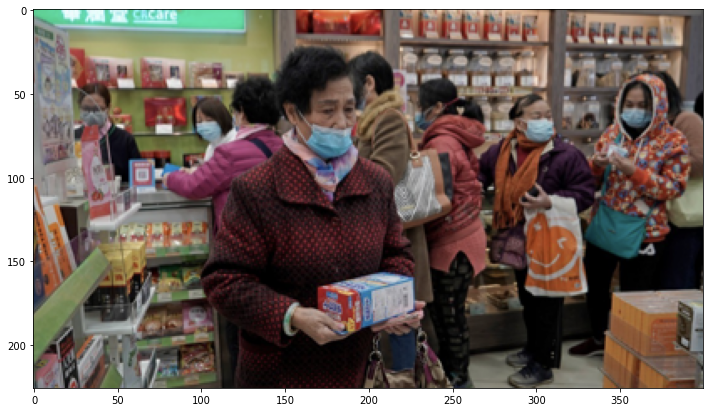

In [13]:
#rendering the image we choose in RGB format
render(convert_RGB(image737))

In [14]:
#finding corresponding annotations to the image
annotation737='../input/face-mask-detection/annotations/' + annotations_info_df['annotation_file'].iloc[0]
annotation737

'../input/face-mask-detection/annotations/maksssksksss737.xml'

In [15]:
#returns a tuple of the number of rows, columns, and channels
image737.shape
#here three channels represent RGB

(226, 400, 3)

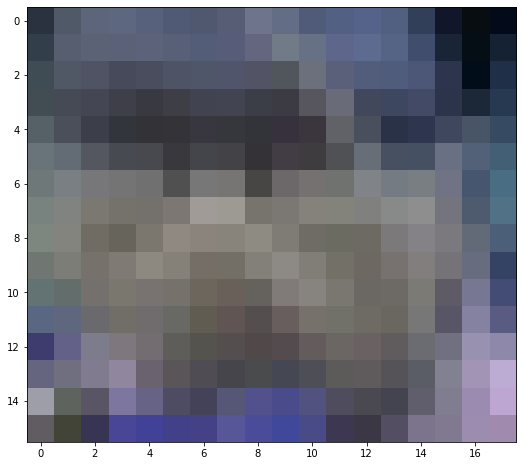

In [16]:
#Extracting information of first face from the data
x=annotations_info_df['xmin'].iloc[0]
y=annotations_info_df['ymin'].iloc[0]
width=annotations_info_df['xmax'].iloc[0]
height=annotations_info_df['ymax'].iloc[0]
#take the required slice of data from the information of first face extracted 
crop737=image737[y:height, x:width]
#rendering the image
render(crop737)

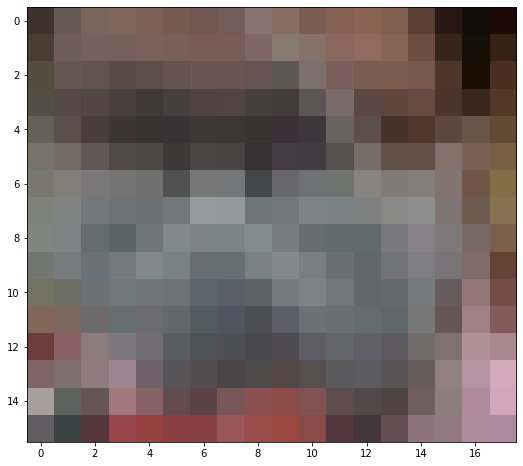

In [17]:
#Image is in pixelated form that is stretched out
#rendering image in RGB format
render(convert_RGB(crop737))

In [18]:
#After the crop ,total images should be equal to length of annotations
# which defines the number of faces present in the data

len(annotations_info_df)

4072

In [19]:
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
5,228,53,241,73,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png
6,34,153,62,176,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
7,88,138,111,163,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
8,139,207,168,234,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png
9,116,135,135,154,with_mask,maksssksksss410,400,267,maksssksksss410.xml,maksssksksss410.png


In [20]:
!ls '../input/face-mask-detection'

annotations  images


In [21]:
#making a new directory named cropped
directory= 'cropped'
parent_directory= '/kaggle/working'
os.mkdir(os.path.join(parent_directory,directory))

In [22]:
#checking if directory added 
!ls './'

__notebook__.ipynb  cropped


In [23]:
#Adding Cropped image into annotation (just the file name)
annotations_info_df['cropped']=annotations_info_df['file']
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138


In [24]:
#traversing through all the annonations present
for i in range(len(annotations_info_df)):
    #selecting the filepath of a single image
    image_filepath='../input/face-mask-detection/images/'+annotations_info_df['image_file'].iloc[i]
    #reading the image
    image=cv2.imread(image_filepath)
    #adding the part and .png at the end of every file
    #example- maksssksksss212 will be given a number according to index and .png will be added
    #for it to become maksssksksss212-4071.png   
    annotations_info_df['cropped'].iloc[i]= annotations_info_df['cropped'].iloc[i] +'-'+ str(i) + '.png'
    cropped_image_filename= annotations_info_df['cropped'].iloc[i]
    #getting the dimension needed to get a cropped images
    xmin= annotations_info_df['xmin'].iloc[i]
    ymin= annotations_info_df['ymin'].iloc[i]
    xmax= annotations_info_df['xmax'].iloc[i]
    ymax= annotations_info_df['ymax'].iloc[i]
    #cropping the image to get a single face and it  to croppedimage 
    croppedimage= image[ymin:ymax, xmin:xmax]
    #saving the cropped image to the designated directory
    cv2.imwrite(os.path.join('./cropped',cropped_image_filename),croppedimage)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-0.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-1.png
2,159,50,193,90,mask_weared_incorrect,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-2.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-3.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,229,53,241,72,with_mask,maksssksksss13,400,226,maksssksksss13.xml,maksssksksss13.png,maksssksksss13-4067.png
4068,51,144,128,239,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4068.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
4070,224,92,309,186,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4070.png


In [26]:
#listing all images into cropped
cropped=!ls './cropped'
cropped[:10]

['maksssksksss0-978.png',
 'maksssksksss0-979.png',
 'maksssksksss0-980.png',
 'maksssksksss1-3455.png',
 'maksssksksss1-3456.png',
 'maksssksksss1-3457.png',
 'maksssksksss1-3458.png',
 'maksssksksss1-3459.png',
 'maksssksksss1-3460.png',
 'maksssksksss1-3461.png']

In [27]:
#check to see if total cropped images are 4072 as stated earlier
print('Total croped images are: ',format(len(cropped)))

Total croped images are:  4072


In [28]:
#getting the file name
annotations_info_df['cropped'].iloc[0]

'maksssksksss737-0.png'

In [29]:
#getting location of the file
cropped737_0path= './cropped/'+annotations_info_df['cropped'].iloc[0]
cropped737_0path

'./cropped/maksssksksss737-0.png'

In [30]:
#reading the image using cv2 
cropped737_0= cv2.imread(cropped737_0path)
cropped737_0

array([[[ 43,  50,  63],
        [ 80,  89, 104],
        [ 93, 101, 122],
        [ 94, 103, 128],
        [ 88,  97, 124],
        [ 81,  90, 116],
        [ 80,  88, 112],
        [ 86,  93, 116],
        [110, 116, 140],
        [100, 109, 134],
        [ 79,  91, 121],
        [ 82,  96, 132],
        [ 85,  99, 138],
        [ 81,  96, 129],
        [ 50,  63,  89],
        [ 17,  23,  41],
        [  8,  13,  18],
        [  3,  10,  26]],

       [[ 50,  62,  74],
        [ 86,  94, 111],
        [ 92,  98, 117],
        [ 91,  98, 119],
        [ 91,  98, 122],
        [ 88,  96, 120],
        [ 84,  93, 119],
        [ 87,  93, 120],
        [ 99, 102, 126],
        [113, 122, 135],
        [103, 113, 133],
        [ 94, 103, 139],
        [ 94, 107, 145],
        [ 85, 100, 133],
        [ 64,  77, 108],
        [ 26,  36,  55],
        [  5,  14,  21],
        [ 21,  34,  52]],

       [[ 63,  76,  84],
        [ 80,  88, 101],
        [ 79,  83,  99],
        [ 70,  74,  9

In [31]:
#getting height, width and channels of the image
cropped737_0.shape

(16, 18, 3)

**Train Test Split**

In [32]:
#spliting the data into 80-20% for train and test respectively
from sklearn.model_selection import train_test_split
train_df,test_df= train_test_split(annotations_info_df,test_size=0.20)

In [33]:
#getting the shape of the dataframe
train_df.shape,test_df.shape

((3257, 11), (815, 11))

In [34]:
train_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
2793,365,98,370,103,with_mask,maksssksksss290,400,268,maksssksksss290.xml,maksssksksss290.png,maksssksksss290-2793.png
2028,50,56,64,71,with_mask,maksssksksss237,400,267,maksssksksss237.xml,maksssksksss237.png,maksssksksss237-2028.png
2467,230,34,264,69,with_mask,maksssksksss448,400,216,maksssksksss448.xml,maksssksksss448.png,maksssksksss448-2467.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
1464,141,30,156,53,with_mask,maksssksksss723,400,226,maksssksksss723.xml,maksssksksss723.png,maksssksksss723-1464.png


In [35]:
#checking for the number of categories of the image label
classes= list(train_df['label'].unique())
classes

['with_mask', 'without_mask', 'mask_weared_incorrect']

In [36]:
train_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
2793,365,98,370,103,with_mask,maksssksksss290,400,268,maksssksksss290.xml,maksssksksss290.png,maksssksksss290-2793.png
2028,50,56,64,71,with_mask,maksssksksss237,400,267,maksssksksss237.xml,maksssksksss237.png,maksssksksss237-2028.png
2467,230,34,264,69,with_mask,maksssksksss448,400,216,maksssksksss448.xml,maksssksksss448.png,maksssksksss448-2467.png
4069,147,169,217,233,with_mask,maksssksksss138,400,267,maksssksksss138.xml,maksssksksss138.png,maksssksksss138-4069.png
1464,141,30,156,53,with_mask,maksssksksss723,400,226,maksssksksss723.xml,maksssksksss723.png,maksssksksss723-1464.png
...,...,...,...,...,...,...,...,...,...,...,...
2766,45,69,96,113,with_mask,maksssksksss167,400,210,maksssksksss167.xml,maksssksksss167.png,maksssksksss167-2766.png
158,267,22,289,44,without_mask,maksssksksss209,400,210,maksssksksss209.xml,maksssksksss209.png,maksssksksss209-158.png
2662,249,43,268,63,with_mask,maksssksksss156,400,267,maksssksksss156.xml,maksssksksss156.png,maksssksksss156-2662.png
1798,131,132,152,153,with_mask,maksssksksss695,400,267,maksssksksss695.xml,maksssksksss695.png,maksssksksss695-1798.png


In [37]:
#Doing object classification on single random image to see if person 
#in the image is masked ,no masked and incorrectly worn
train_df[train_df['file']=='maksssksksss52']['label'].unique()

array(['with_mask', 'without_mask', 'mask_weared_incorrect'], dtype=object)

In [38]:
#reading the image
image52_path='../input/face-mask-detection/images/maksssksksss52.png'
image52= cv2.imread(image52_path)
image52

array([[[201, 186, 190],
        [178, 169, 171],
        [126, 120, 121],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[178, 164, 164],
        [168, 159, 157],
        [163, 157, 154],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       [[146, 135, 132],
        [145, 138, 134],
        [148, 144, 139],
        ...,
        [ 21,  15,  17],
        [ 21,  15,  17],
        [ 21,  15,  17]],

       ...,

       [[ 29,  30,  33],
        [ 29,  30,  33],
        [ 29,  30,  33],
        ...,
        [ 42,  50,  58],
        [ 40,  48,  56],
        [ 42,  51,  59]],

       [[ 31,  32,  33],
        [ 31,  32,  33],
        [ 31,  33,  33],
        ...,
        [ 41,  49,  57],
        [ 41,  49,  57],
        [ 45,  53,  61]],

       [[ 34,  35,  36],
        [ 35,  37,  38],
        [ 37,  39,  40],
        ...,
        [ 42,  50,  58],
        [ 39,  47,  55],
        [ 44,  52,  60]]

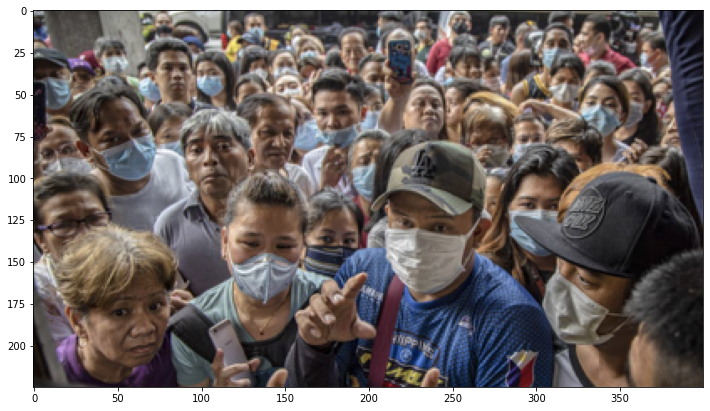

In [39]:
#rendering the image in RGB format
image52_rgb=convert_RGB(image52)
render(image52_rgb)

In [40]:
#finding annotations corresponding to the image 
image52_df=train_df[train_df['file']== 'maksssksksss52']
image52_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped
3817,228,9,236,19,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3817.png
3787,39,65,75,103,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3787.png
3805,157,61,173,84,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3805.png
3797,74,31,96,53,without_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3797.png
3799,41,23,58,40,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3799.png
3800,1,34,24,61,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3800.png
3804,97,34,115,53,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3804.png
3821,260,74,285,97,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3821.png
3791,161,130,195,163,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3791.png
3829,352,48,366,71,with_mask,maksssksksss52,400,225,maksssksksss52.xml,maksssksksss52.png,maksssksksss52-3829.png


In [41]:
#adding the persons into withmask ,withoutmask, incorrectly worn lists 
withmaskl,withoutmaskl,incorrectl=[],[],[]
for i in range(len(image52_df)):
    bb= [image52_df['xmin'].iloc[i],
        image52_df['ymin'].iloc[i],
        image52_df['xmax'].iloc[i],
        image52_df['ymax'].iloc[i]]
    if image52_df['label'].iloc[i]== 'with_mask':
        withmaskl.append(bb)
    elif image52_df['label'].iloc[i]=='without_mask':
        withoutmaskl.append(bb)
    else:
        incorrectl.append(bb)
#creating a dictionary with the lists above
foundobjectdict= {
    'With Mask': withmaskl,
    'Without Mask': withoutmaskl,
    'Incorrectly Worn': incorrectl
}
foundobjectdict

{'With Mask': [[228, 9, 236, 19],
  [39, 65, 75, 103],
  [157, 61, 173, 84],
  [41, 23, 58, 40],
  [1, 34, 24, 61],
  [97, 34, 115, 53],
  [260, 74, 285, 97],
  [161, 130, 195, 163],
  [352, 48, 366, 71],
  [94, 22, 103, 33],
  [209, 119, 262, 170],
  [205, 6, 210, 18],
  [362, 23, 370, 36],
  [284, 111, 316, 150],
  [268, 110, 279, 127],
  [145, 42, 160, 56],
  [303, 147, 352, 203],
  [286, 73, 307, 90],
  [127, 31, 142, 44],
  [197, 37, 214, 58],
  [194, 54, 211, 73],
  [2, 77, 35, 99],
  [270, 33, 281, 49],
  [129, 7, 139, 19],
  [310, 39, 329, 58],
  [328, 51, 352, 77],
  [116, 132, 161, 175],
  [115, 10, 120, 19],
  [154, 13, 163, 24],
  [191, 84, 208, 117],
  [159, 21, 171, 32],
  [63, 37, 77, 56],
  [250, 4, 261, 16],
  [304, 16, 322, 36]],
 'Without Mask': [[74, 31, 96, 53],
  [246, 51, 256, 72],
  [221, 51, 246, 77],
  [378, 61, 388, 84],
  [185, 20, 200, 37],
  [131, 67, 157, 97],
  [276, 9, 284, 19],
  [37, 166, 84, 214]],
 'Incorrectly Worn': [[168, 57, 196, 85],
  [326, 11

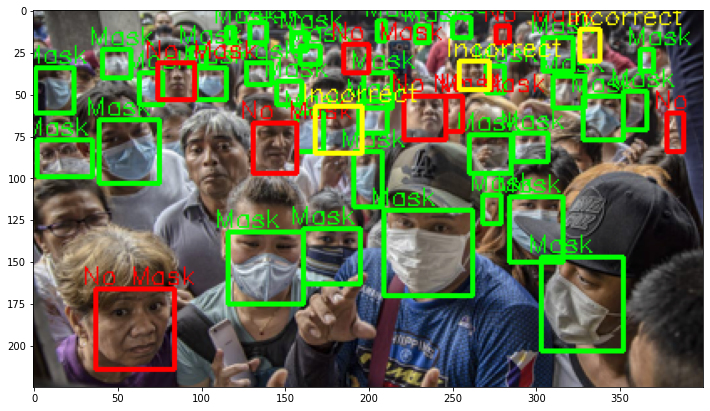

In [42]:
#traversing through the dictionary 
for key, value in foundobjectdict.items():
    #assigning color according to label the person has
    for i in range(len(value)):
        #by default , color and text for masked person to be: 'green' and 'mask' 
        color= (0,255,0)
        text='Mask'
        if key=='Without Mask':
            #color and text for unmasked person to be: 'red' and 'no mask'
            color= (255,0,0)
            text='No Mask'
        elif key== 'Incorrectly Worn':
            #color text for incorrectly worn masked person to be: 'yellow' and 'incorrect'
            color= (255,255,0)
            text='Incorrect'
        #finfing corners of starting line and ending lines of the face of person
        start=(value[i][0],value[i][1])
        end=(value[i][2],value[i][3])
        #creating a rectangle across the face according to the color
        cv2.rectangle(image52_rgb,start,end,color=color,thickness=2)
        #putting text on image with the rectangle
        cv2.putText(image52_rgb, org= (value[i][0]-8,value[i][1]-3),text=text,
                   fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.5,color=color)
#rendering image with the updates on the image
render(image52_rgb)

**Exploratory Data Analysis**

In [43]:
#counted occurence of the label of images 
train_df['label'].value_counts()

with_mask                2586
without_mask              570
mask_weared_incorrect     101
Name: label, dtype: int64

In [44]:
#creating a sorted label into a Two-dimensional mutable dataframe with index 0,1,2 
sortedlabel=pd.DataFrame(train_df['label'].value_counts()).reset_index()
sortedlabel.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sortedlabel

,label,count
0,with_mask,2586
1,without_mask,570
2,mask_weared_incorrect,101


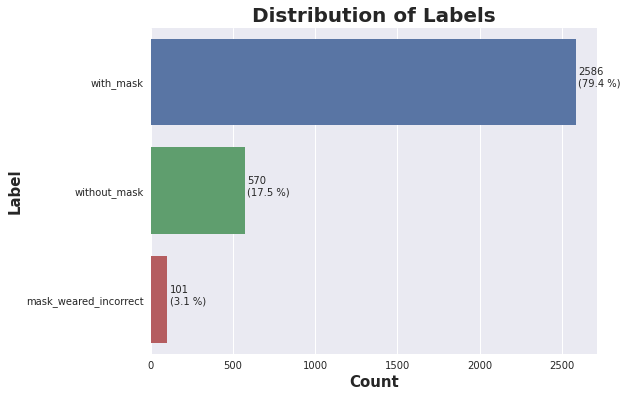

In [45]:
#plotting the barplot of the label occurred
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))

barplot = sns.barplot(x = 'count', y = 'label', data = sortedlabel)
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    #to calculate percentage of each label in the data specified
    percentage = round(width * 100 / sum(sortedlabel['count']), 2)
    #putting text about the numer and the percentage corresponding to each label
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [46]:
#getting the width,height and channels of first image
croppedpath = './cropped/' + train_df['cropped'].iloc[0]
croppedimage = cv2.imread(croppedpath)
croppedimage.shape

(5, 5, 3)

In [47]:
#adding image width and image height of every image to the list 
imagewidth=[]
imageheight=[]
#traversing through the all image
for i in range(len(train_df)):
    croppedimagepath= './cropped/'+train_df['cropped'].iloc[i] 
    croppedimage=cv2.imread(croppedimagepath)
    #adding image height and width of the image to list
    imagewidth.append(croppedimage.shape[0])
    imageheight.append(croppedimage.shape[1])
    

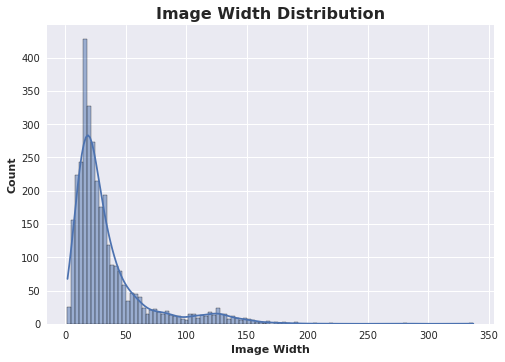

In [48]:
#plotting histogram of imagewidth
sns.histplot(imagewidth,kde=True)
plt.title('Image Width Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Width',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

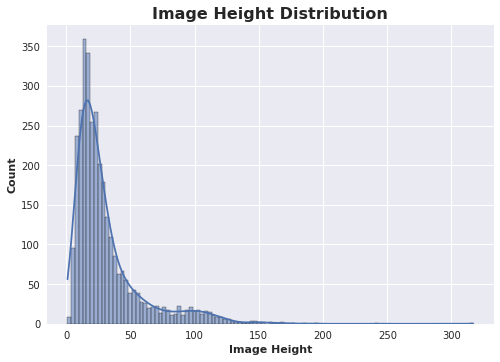

In [49]:
#plotting histogram of imageheight
sns.histplot(imageheight,kde=True)
plt.title('Image Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Image Height',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

**Preprocessing**

In [50]:
#taking median of imagewidth and imageheight as targetimage size 
targetimage=(int(np.median(imagewidth)),int(np.median(imageheight)))
targetimage

(24, 22)

In [51]:
# using imagedatagenerator expand the training dataset in order 
# to improve the performance and ability of the model to generalize.
from keras_preprocessing.image import ImageDataGenerator
#rescale=1./255 will convert the pixels in range [0,255] to range [0,1], thus normalising the data and
#contributing to total losses , moreover we are also spliting image generator for 25 percent validation set.
train_image_generator= ImageDataGenerator(rescale= 1. / 255. , validation_split=0.25)
#train image generator to generate batches of tensor train image dataset with augmentation.
train_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df, 
    directory='./cropped',
    x_col='cropped',
    y_col='label',
    #using 75%  dataset as training set
    subset='training',
    #size of batch of data being 32
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode= 'categorical',
    target_size = targetimage
    )
#valid image generator to generate batches of tensor valid image dataset with augmentation.
valid_generator= train_image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 2443 validated image filenames belonging to 3 classes.
Found 814 validated image filenames belonging to 3 classes.


In [52]:
#also creating image generator for test dataset for randomness
test_image_generator= ImageDataGenerator(rescale = 1./255.)
#test image generator with augmented data to test acccuracy of the model
test_generator= train_image_generator.flow_from_dataframe(
    #will use test_df as dataframe
    dataframe=test_df,
    directory= './cropped',
    x_col='cropped',
    y_col='label',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_model= 'categorical',
    target_size=targetimage
    
)

Found 815 validated image filenames belonging to 3 classes.


**Modelling**

In [53]:
#taking input shape as median of imagewidth,median of imageheight, 3 as channels because colours are RGB
inputshape= [int(np.median(imagewidth)),int(np.median(imageheight)),3]
inputshape

[24, 22, 3]

In [54]:
#using a sequential model as there exist only one input that is the image and
#only one output that is whether it is with mask, no mask or incorrectly worn mask
model1= keras.models.Sequential([
    #Conv2D creates a convolution kernel that is combined with the layer input to produce a tensor of outputs
    #here filter provides a measure for a region of the input to resemble a feature
    #kernel size specifies the height and width of the 2D convolution window
    #activation has activation function relu(Rectified Linear Unit) which keeps all negative values to be zero and all other values to be constant
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=inputshape),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    #MaxPool2D downsamples the input along its height and width by taking the maximum value over an input matrix for each channel of the input
    # pool_size signify window size (matrix window ) over which to take the maximum
    #padding valid ensure that no padding is necessary for model.
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    #flatten function will flattens the multi-dimensional input tensors into a single dimension
    keras.layers.Flatten(),
    #Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
    #unit size decides  the dimensionality of the output space which is 3 in this case
    #activation function softmax has been used as class is of size 3 and softmax predicts a multinomial probability distribution
    keras.layers.Dense(units=len(classes),activation='softmax')
    
    
])

2022-10-30 09:59:38.473472: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [55]:
#compiling the model by configuring the model with losses and metrics
#loss function used to find deviation in learning process;
#here categoricalcrossentrophy used as loss function because it is for multi-class classification model where there exists two or more output labels.
#optimiser optimizes the input weights by comparing the prediction and the loss function,Adam optimization is a stochastic gradient descent method as its faster
#Metrics is used to evaluate the performance of the model here mterics.recall recalls the prediction on basis of labels
model1.compile(loss= 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',keras.metrics.Recall()])
#fit trains the model for a fixed number of epochs
#here input is train_generator, epochs represents one complete pass of the training dataset through the algorithm
#steps_per_epoch is total number of batches of samples before declaring one epoch finished so the model goes through all the test generator data once in our case
#validation data is data on which to evaluate the loss and any model metrics at the end of each epoch, model is not trained on it
#validation steps is total number of batches of samples to draw before stopping when performing validation at the end of every epoch
history1=model1.fit(train_generator,epochs=10,steps_per_epoch=len(train_generator),
                   validation_data=valid_generator,validation_steps=len(valid_generator))

2022-10-30 09:59:38.837642: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
77/77 [==============================] - 3s 28ms/step - loss: 0.5696 - accuracy: 0.7884 - recall: 0.7294 - val_loss: 0.4436 - val_accuracy: 0.8120 - val_recall: 0.7973
Epoch 2/10
77/77 [==============================] - 2s 26ms/step - loss: 0.3647 - accuracy: 0.8702 - recall: 0.8404 - val_loss: 0.2690 - val_accuracy: 0.9251 - val_recall: 0.9177
Epoch 3/10
77/77 [==============================] - 2s 26ms/step - loss: 0.2683 - accuracy: 0.9144 - recall: 0.9083 - val_loss: 0.2189 - val_accuracy: 0.9373 - val_recall: 0.9300
Epoch 4/10
77/77 [==============================] - 2s 26ms/step - loss: 0.2321 - accuracy: 0.9259 - recall: 0.9198 - val_loss: 0.2212 - val_accuracy: 0.9324 - val_recall: 0.9238
Epoch 5/10
77/77 [==============================] - 2s 30ms/step - loss: 0.2227 - accuracy: 0.9259 - recall: 0.9206 - val_loss: 0.2000 - val_accuracy: 0.9423 - val_recall: 0.9386
Epoch 6/10
77/77 [==============================] - 2s 23ms/step - loss: 0.2095 - accuracy: 0.9341 - reca

In [56]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result1=pd.DataFrame(history1.history)
result1

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.569609,0.788375,0.729431,0.443616,0.812039,0.797297
1,0.364706,0.870242,0.840360,0.269027,0.925061,0.917690
2,0.268302,0.914449,0.908309,0.218860,0.937346,0.929975
3,0.232055,0.925911,0.919771,0.221243,0.932432,0.923833
4,0.222652,0.925911,0.920589,0.199978,0.942260,0.938575
5,0.209506,0.934097,0.929595,0.197566,0.941032,0.936118
6,0.204961,0.931641,0.927139,0.192985,0.941032,0.936118
7,0.199606,0.933279,0.930004,0.194245,0.942260,0.939803
8,0.197074,0.934916,0.930823,0.193477,0.943489,0.933661
9,0.189844,0.936553,0.933279,0.228897,0.928747,0.923833


<AxesSubplot:>

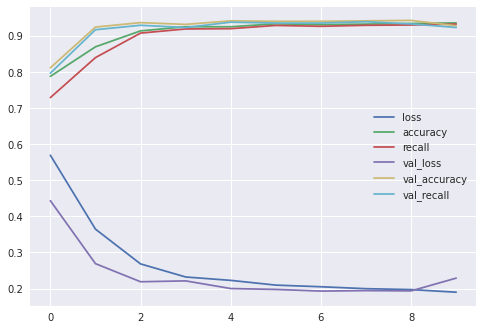

In [57]:
#plotting the result
result1.plot()

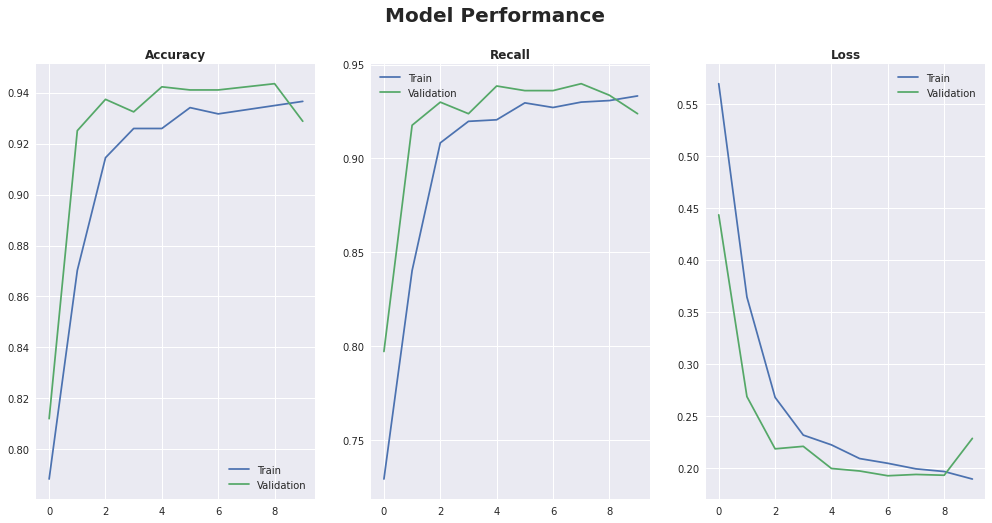

In [58]:
#plotting the lines of train and validate values returned
def plot_line(result,ax,col,title,train_col,valid_col):
    ax[col].plot(result[train_col])
    ax[col].plot(result[valid_col])
    
    ax[col].set_title(title,fontweight='bold')
    ax[col].legend(['Train','Validation'])
#plotting 3 graphs corresponding to accuracy, recall and loss
def plot_result(result,train_recol,valid_recol):
    fig,ax= plt.subplots(nrows=1,ncols=3,figsize=(17,8))
    fig.suptitle('Model Performance', fontsize=20, fontweight='bold')
    
    plot_line(result,ax,0,'Accuracy','accuracy','val_accuracy')
    plot_line(result,ax,1,'Recall',train_recol,valid_recol)
    plot_line(result,ax,2,'Loss','loss','val_loss')
    plt.show()

#plotting the graphs for model1 result
plot_result(result1,'recall','val_recall')

**Early Stopping Callback**

In [59]:
#creating model2 of sequentical cnn 
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = inputshape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [60]:
#compiling the losses of model2
model2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])
#EarlyStopping stop training when a monitored metric has stopped improving.
#val_loss is monitored where val_loss is losses occured during validation
# mode min signifies training will stop when the quantity monitored has stopped decreasing
#verbose 1 displays messages when the callback takes an action and patience represent number of epochs with no improvement after which training will be stopped
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
#fitting model for 100 epoches but with callback
history2 = model2.fit(train_generator,
                        epochs = 100,
                        steps_per_epoch = len(train_generator),
                        validation_data = valid_generator,
                        validation_steps = len(valid_generator),
                        callbacks = callbacks)

Epoch 1/100
77/77 [==============================] - 3s 31ms/step - loss: 0.6854 - accuracy: 0.7135 - recall_1: 0.6124 - val_loss: 0.5221 - val_accuracy: 0.8108 - val_recall_1: 0.8059
Epoch 2/100
77/77 [==============================] - 2s 32ms/step - loss: 0.4624 - accuracy: 0.8223 - recall_1: 0.8052 - val_loss: 0.2581 - val_accuracy: 0.9214 - val_recall_1: 0.9103
Epoch 3/100
77/77 [==============================] - 2s 24ms/step - loss: 0.2705 - accuracy: 0.9128 - recall_1: 0.8993 - val_loss: 0.2148 - val_accuracy: 0.9349 - val_recall_1: 0.9300
Epoch 4/100
77/77 [==============================] - 2s 23ms/step - loss: 0.2355 - accuracy: 0.9218 - recall_1: 0.9128 - val_loss: 0.2062 - val_accuracy: 0.9410 - val_recall_1: 0.9337
Epoch 5/100
77/77 [==============================] - 2s 26ms/step - loss: 0.2267 - accuracy: 0.9292 - recall_1: 0.9190 - val_loss: 0.2154 - val_accuracy: 0.9312 - val_recall_1: 0.9214
Epoch 6/100
77/77 [==============================] - 2s 23ms/step - loss: 0.2075

In [61]:
#accessing the history dictionary of model fit into dataframes to get ['accuracy', 'loss', 'val_accuracy', 'val_loss'] of each epoch
result2 = pd.DataFrame(history2.history)
result2

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.685396,0.713467,0.612362,0.522095,0.810811,0.805897
1,0.462410,0.822350,0.805158,0.258145,0.921376,0.910319
2,0.270480,0.912812,0.899304,0.214825,0.934889,0.929975
3,0.235504,0.921817,0.912812,0.206163,0.941032,0.933661
4,0.226731,0.929185,0.918952,0.215425,0.931204,0.921376
5,0.207491,0.934916,0.927139,0.203875,0.937346,0.929975
6,0.198639,0.936144,0.929595,0.199413,0.936118,0.929975
7,0.192097,0.934916,0.930823,0.199701,0.932432,0.929975
8,0.185578,0.935735,0.931232,0.186963,0.947174,0.942260
9,0.184424,0.941056,0.932869,0.182589,0.943489,0.937346


<AxesSubplot:>

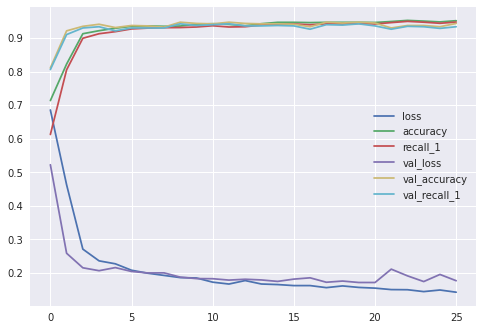

In [62]:
#plotting result
result2.plot()

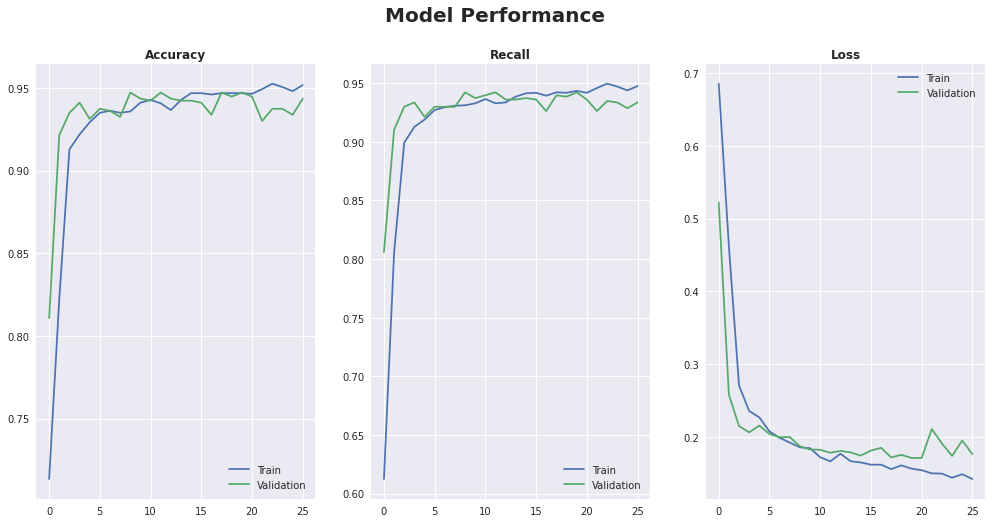

In [63]:
#plotting the graphs for model1 result
plot_result(result2, 'recall_1', 'val_recall_1')

**Accuracy**

In [64]:
model1.evaluate(test_generator)
model2.evaluate(test_generator)

26/26 [==============================] - 0s 15ms/step - loss: 0.1737 - accuracy: 0.9362 - recall_1: 0.9313


[0.17372927069664001, 0.9361963272094727, 0.9312883615493774]

Hence, Model1 is **93.13** percent accurate and
Model2 is **94.48** percent accuarte